In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)
    
    
#Sequence Vector Features    
#Training Features
training_features_path = "./Pickles/sv_training_features.pickle"
with open(training_features_path, 'rb') as data:
    sv_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/sv_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    sv_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/sv_test_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/sv_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/sv_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/sv_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_validation_labels = pickle.load(data)

In [3]:
#category_names=['Singapore','Sports','Lifestyle','World','Business','Technology']
category_names=all_articles.category.unique()
category_names

array(['Lifestyle', 'World', 'Technology', 'Business', 'Singapore',
       'Sports'], dtype=object)

In [4]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Using TD-IDF Features

In [5]:
mnb.fit(tdidf_training_features, tdidf_training_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
mnb_pred = mnb.predict(tdidf_test_features)

In [7]:
# Training Accuracy
print("The Training Accuracy is: ",accuracy_score(tdidf_training_labels, mnb.predict(tdidf_training_features)))

# Testing Accuracy
print("The Testing Accuracy is: ",accuracy_score(tdidf_test_labels, mnb.predict(tdidf_test_features)))

# Validation Accuracy
print("The Validation Accuracy is: ",accuracy_score(tdidf_validation_labels, mnb.predict(tdidf_validation_features)))

The Training Accuracy is:  0.8533333333333334
The Testing Accuracy is:  0.7866666666666666
The Validation Accuracy is:  0.81


In [8]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(tdidf_test_features)

print('accuracy %s' % accuracy_score(mnb_pred, tdidf_test_labels))
print(classification_report(tdidf_test_labels, mnb_pred))

accuracy 0.7866666666666666
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        41
           2       0.98      0.94      0.96        62
           3       0.89      0.94      0.91        51
           4       0.73      0.64      0.68        47
           5       0.67      0.61      0.64        54
           6       0.61      0.73      0.67        45

    accuracy                           0.79       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.79      0.79      0.79       300

Wall time: 4.99 ms


In [9]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(tdidf_validation_features)

print('accuracy %s' % accuracy_score(mnb_pred, tdidf_validation_labels))
print(classification_report(tdidf_validation_labels, mnb_pred))

accuracy 0.81
              precision    recall  f1-score   support

           1       0.83      0.81      0.82        62
           2       0.98      1.00      0.99        43
           3       0.77      0.89      0.83        46
           4       0.79      0.74      0.77        42
           5       0.80      0.72      0.76        54
           6       0.71      0.74      0.72        53

    accuracy                           0.81       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.81      0.81      0.81       300

Wall time: 5.98 ms


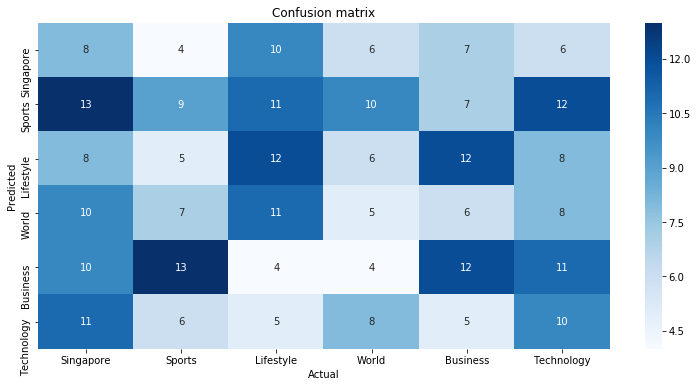

In [10]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, mnb_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [11]:
d = {
     'Model': 'Multinomial Naïve Bayes',
    'Features': 'TD-IDF',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, mnb.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, mnb.predict(tdidf_test_features))
}

df_models_mnb = pd.DataFrame(d, index=[0])

In [12]:
df_models_mnb

,Model,Features,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,TD-IDF,0.853333,0.786667


In [13]:
with open('Models/MNB_best_model_tdidf.pickle', 'wb') as output:
    pickle.dump(mnb, output)

## Using Sequence Vector Features

In [14]:
mnb.fit(sv_training_features, sv_training_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
mnb_pred = mnb.predict(sv_test_features)

In [16]:
# Training Accuracy
print("The Training Accuracy is: ",accuracy_score(sv_training_labels, mnb.predict(sv_training_features)))

# Testing Accuracy
print("The Testing Accuracy is: ",accuracy_score(sv_test_labels, mnb.predict(sv_test_features)))

# Validation Accuracy
print("The Validation Accuracy is: ",accuracy_score(sv_validation_labels, mnb.predict(sv_validation_features)))

The Training Accuracy is:  0.2633333333333333
The Testing Accuracy is:  0.24
The Validation Accuracy is:  0.20333333333333334


In [17]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(sv_test_features)

print('accuracy %s' % accuracy_score(mnb_pred, sv_test_labels))
print(classification_report(sv_test_labels, mnb_pred))

accuracy 0.24
              precision    recall  f1-score   support

           1       0.19      0.07      0.11        41
           2       0.25      0.90      0.40        62
           3       0.20      0.04      0.07        51
           4       0.25      0.02      0.04        47
           5       0.24      0.13      0.17        54
           6       0.14      0.07      0.09        45

    accuracy                           0.24       300
   macro avg       0.21      0.21      0.14       300
weighted avg       0.22      0.24      0.16       300

Wall time: 4.99 ms


In [18]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(sv_validation_features)

print('accuracy %s' % accuracy_score(mnb_pred, sv_validation_labels))
print(classification_report(sv_validation_labels, mnb_pred))

accuracy 0.20333333333333334
              precision    recall  f1-score   support

           1       0.24      0.06      0.10        62
           2       0.16      0.81      0.27        43
           3       0.53      0.17      0.26        46
           4       0.00      0.00      0.00        42
           5       0.16      0.09      0.12        54
           6       0.43      0.17      0.24        53

    accuracy                           0.20       300
   macro avg       0.25      0.22      0.17       300
weighted avg       0.26      0.20      0.16       300

Wall time: 5.98 ms


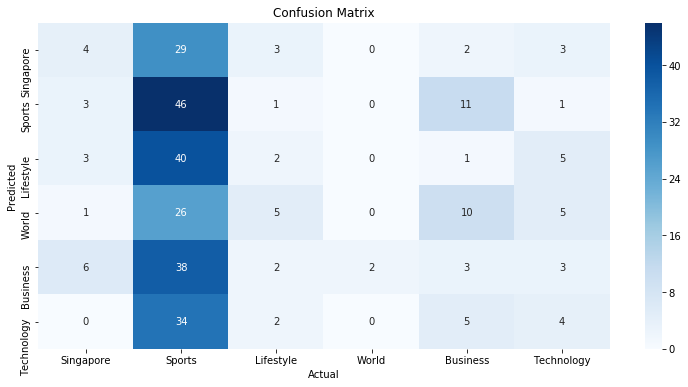

In [19]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(sv_test_labels, mnb_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['category'].values, 
            yticklabels=aux_df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
d = {
     'Model': 'Multinomial Naïve Bayes',
    'Features': 'Sequence Vectors',
     'Training Set Accuracy': accuracy_score(sv_training_labels, mnb.predict(sv_training_features)),
     'Test Set Accuracy': accuracy_score(sv_test_labels, mnb.predict(sv_test_features))
}

df_models_mnb_sv = pd.DataFrame(d, index=[0])

In [21]:
df_model_evaluation = df_models_mnb.append(df_models_mnb_sv)
df_model_evaluation

,Model,Features,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,TD-IDF,0.853333,0.786667
0,Multinomial Naïve Bayes,Sequence Vectors,0.263333,0.240000


In [22]:
with open('Models/MNB_best_model_tdidf.pickle', 'wb') as output:
    pickle.dump(mnb, output)
    
with open('Models/MNB_best_model_details.pickle', 'wb') as output:
    pickle.dump(df_model_evaluation, output)